### Análisis de componentes principales (PCA)



### Introducción
En esta guia vamos a trabajar con algoritmos de reducción de dimensionalidad, que es una técnica de aprendizaje automático no supervisado
<br />
A lo largo de esta guía veremos:
- Como preparar (escalar) datos para un proceso de reducción de dimensiones
- Como reducir dimesiones por medio de análisis de componentes principales
- Como seleccionar las componentes
- Como identificar que variales aportan a cada componente


En este notebook vamos a utilizar las siguientes librerías:
- Scikit-learn para el análisis,
- Pandas para gestión de datos
- Matplotlib para los gráficos.

## Preparando los datos para PCA

Para comenzar, cargamos el conjunto de datos a utilizar

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = pd.read_csv("data_cancer.csv",sep=";")
data_copy = data.drop(axis=1,columns=["id","diagnosis"])

Dado que PCA comprende un procedimiento matemático que transforma un conjunto de variables correlacionadas de respuesta en un conjunto menor de variables no correlacionadas llamadas componentes principales, debemos identificar si existen o no correlaciones entre nuestra variables.

## MATRIZ DE CORRELACIÓN

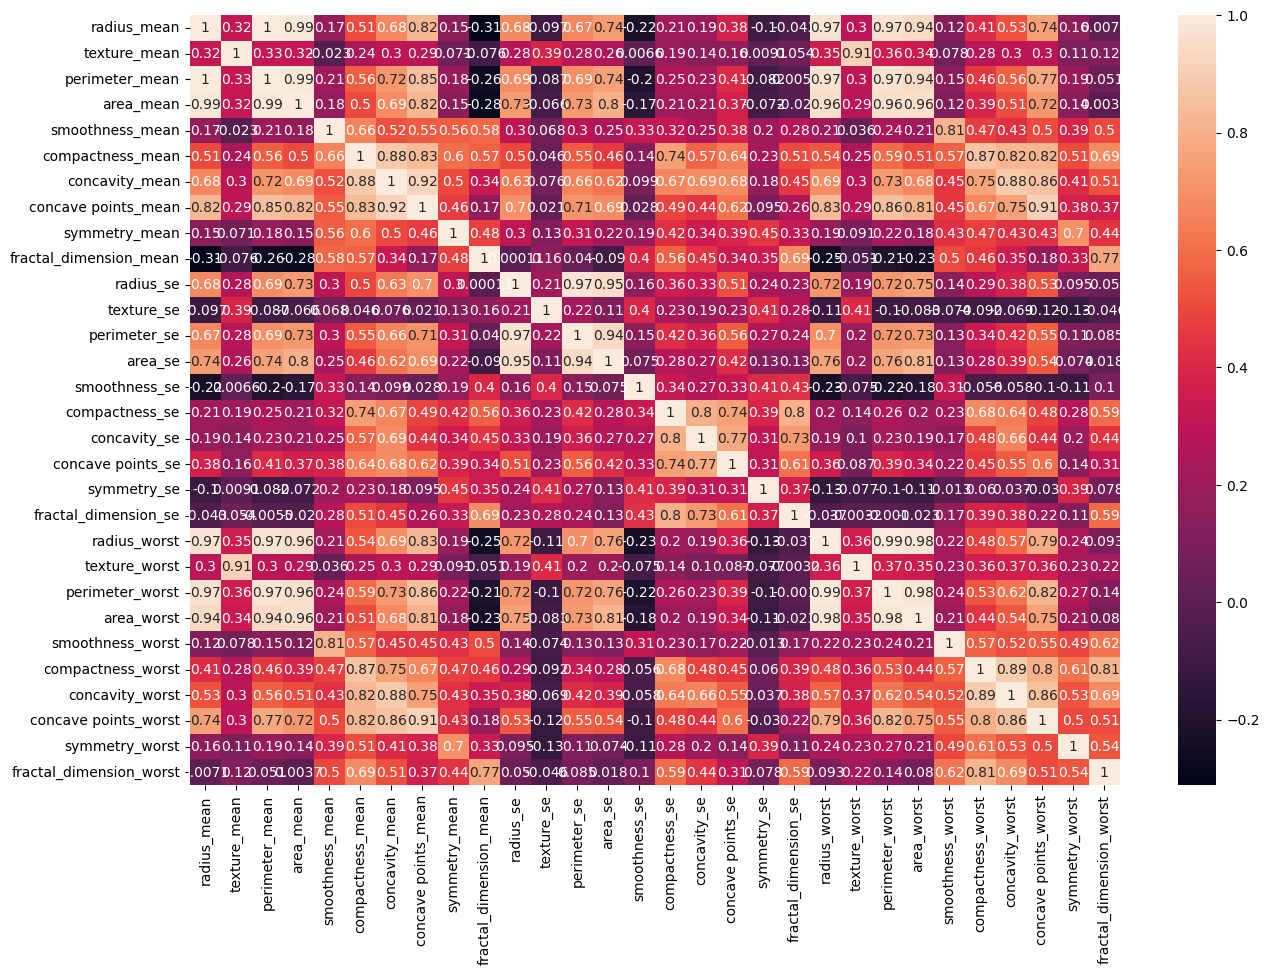

In [3]:
corr_data=data_copy.corr()
corr_data.to_csv('corr_data.csv', header=True, index=True)

plt.figure(figsize=(15,10))
sns.heatmap(corr_data,fmt='.2g',annot=True)
plt.show()

## Estandarización de variables

In [4]:
scaler =StandardScaler()
df_estand = scaler.fit_transform(data_copy)
df_estand = pd.DataFrame(df_estand, columns=data_copy.columns)
df_estand

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


## Reducción de dimensiones PCA

### Sin estandarizar

In [5]:
pca = PCA(n_components=10)
data_pca = pca.fit_transform(data_copy)
loadings = pca.components_
for i, pc_loadings in enumerate(loadings):
    print(f"Loadings for PC{i + 1}:")
    for j, variable_loading in enumerate(pc_loadings):
        print(f"{df_estand.columns.tolist()[j]} {j + 1}: {variable_loading:.4f}")

Loadings for PC1:
radius_mean 1: 0.0051
texture_mean 2: 0.0022
perimeter_mean 3: 0.0351
area_mean 4: 0.5168
smoothness_mean 5: 0.0000
compactness_mean 6: 0.0000
concavity_mean 7: 0.0001
concave points_mean 8: 0.0000
symmetry_mean 9: 0.0000
fractal_dimension_mean 10: -0.0000
radius_se 11: 0.0003
texture_se 12: -0.0001
perimeter_se 13: 0.0022
area_se 14: 0.0557
smoothness_se 15: -0.0000
compactness_se 16: 0.0000
concavity_se 17: 0.0000
concave points_se 18: 0.0000
symmetry_se 19: -0.0000
fractal_dimension_se 20: -0.0000
radius_worst 21: 0.0072
texture_worst 22: 0.0031
perimeter_worst 23: 0.0495
area_worst 24: 0.8521
smoothness_worst 25: 0.0000
compactness_worst 26: 0.0001
concavity_worst 27: 0.0002
concave points_worst 28: 0.0001
symmetry_worst 29: 0.0000
fractal_dimension_worst 30: 0.0000
Loadings for PC2:
radius_mean 1: 0.0093
texture_mean 2: -0.0029
perimeter_mean 3: 0.0627
area_mean 4: 0.8518
smoothness_mean 5: -0.0000
compactness_mean 6: -0.0000
concavity_mean 7: 0.0001
concave poin

### Varianza explicada para selección de número de componentes


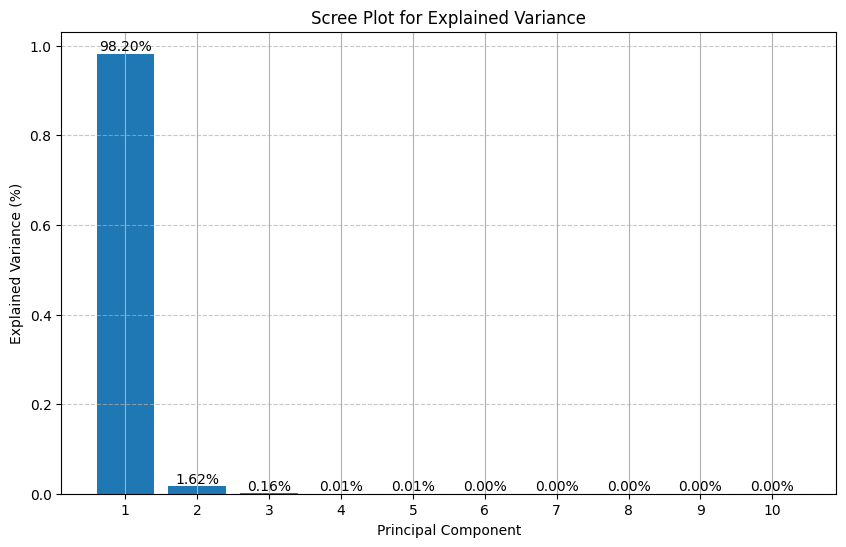

In [6]:
explained_variance = pca.explained_variance_ratio_

plt.figure (figsize=(10,6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot for Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)

# Add labels on top of each bin
for i, ratio in enumerate(explained_variance):
    plt.text(i + 1, ratio, f'{ratio:.2%}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Estandarizadas

In [7]:
pca = PCA(n_components=10)
data_pca = pca.fit_transform(df_estand)

## Varianza explicada

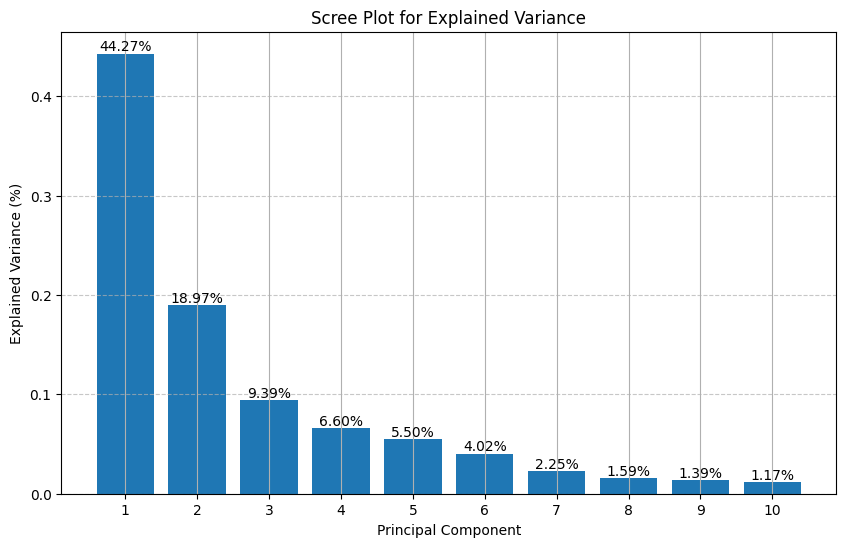

In [8]:
explained_variance = pca.explained_variance_ratio_

plt.figure (figsize=(10,6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot for Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)

# Add labels on top of each bin
for i, ratio in enumerate(explained_variance):
    plt.text(i + 1, ratio, f'{ratio:.2%}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
data_pca=pd.DataFrame(data_pca, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159366,-0.398407,-0.157101,-0.877441
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013363,0.240987,-0.711924,1.107037
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167,0.097369,0.024062,0.454277
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429915,1.059558,-1.405467,-1.116927
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636378,-0.263803,0.377702
...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596128,-0.035472,0.987922,0.257004
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716324,-1.113360,-0.105217,-0.108612
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192757,0.341887,0.393912,0.520889
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223076,-0.280239,-0.542009,-0.089351


### Variables que aportan a cada componente

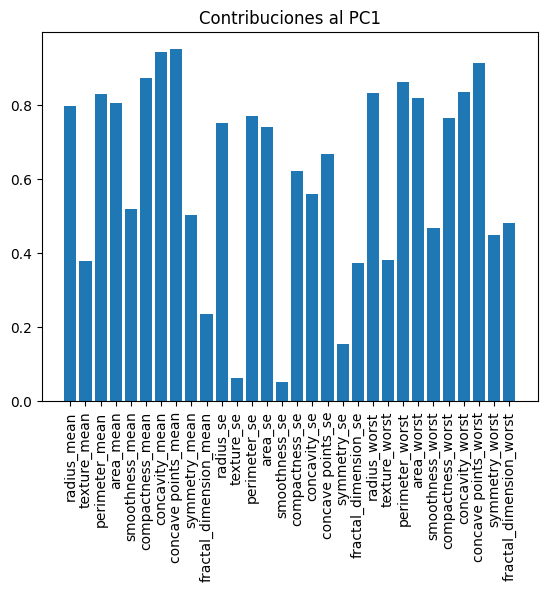

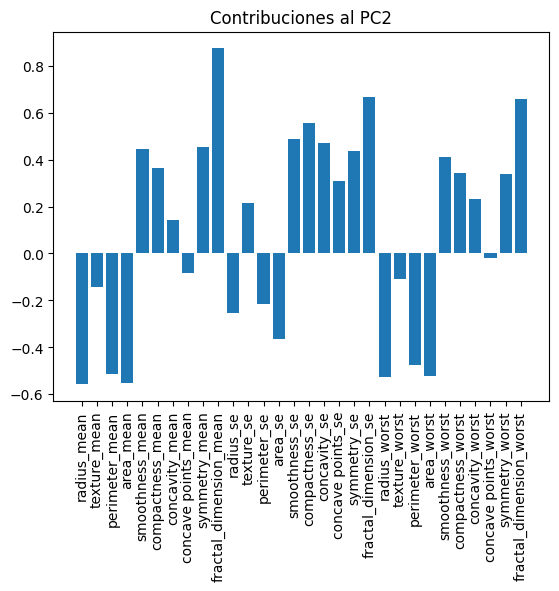

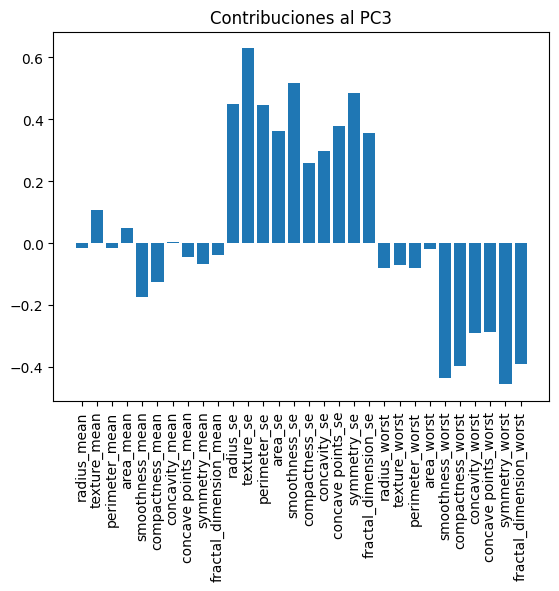

In [10]:
# Contribuciones 
contribuciones = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear un DataFrame con las contribuciones y nombres de variables
contrib_df = pd.DataFrame(contribuciones, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=data_copy.columns)

# Visualizar las contribuciones para el primer componente principal 
plt.bar(contrib_df.index, contrib_df.iloc[:, 0])
plt.xticks(rotation='vertical')
plt.title(f'Contribuciones al {contrib_df.columns[0]}')
plt.show()

# Visualizar las contribuciones para el segundo componente principal
plt.bar(contrib_df.index, contrib_df.iloc[:, 1])
plt.xticks(rotation='vertical')
plt.title(f'Contribuciones al {contrib_df.columns[1]}')
plt.show()

# Visualizar las contribuciones para el tercer componente principal
plt.bar(contrib_df.index, contrib_df.iloc[:, 2])
plt.xticks(rotation='vertical')
plt.title(f'Contribuciones al {contrib_df.columns[2]}')
plt.show()
